In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
data=pd.read_excel(r"C:\Users\mohan\Desktop\EXCEL r assignment\Forecasting\Airlines+Data.xlsx" ,index_col=[0],parse_dates=True,squeeze=True)
data.head()

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
Name: Passengers, dtype: int64

In [3]:
data.columns

Index(['Month', 'Passengers'], dtype='object')

In [8]:
data["Month"] = pd.to_datetime(data.Month,format="%y-%b")

,Month,Passengers,Month1
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01


In [12]:
data["year"] = data.Month1.dt.strftime("%Y") # month extraction
data["Month_no"] = data.Month1.dt.strftime("%b") # year extraction


In [15]:
data.head()

,Passengers,Month1,year,Month_no
Month,,,,
1995-01-01,112,1995-01-01,1995,Jan
1995-02-01,118,1995-02-01,1995,Feb
1995-03-01,132,1995-03-01,1995,Mar
1995-04-01,129,1995-04-01,1995,Apr
1995-05-01,121,1995-05-01,1995,May


In [27]:
data1=data.drop(columns="Month1")

In [28]:
data1.head()

,Passengers,year,Month_no
Month,,,
1995-01-01,112,1995,Jan
1995-02-01,118,1995,Feb
1995-03-01,132,1995,Mar
1995-04-01,129,1995,Apr
1995-05-01,121,1995,May


In [29]:
data_f= pd.get_dummies(data1)

In [36]:
data_f

,Passengers,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,Month_no_Apr,...,Month_no_Dec,Month_no_Feb,Month_no_Jan,Month_no_Jul,Month_no_Jun,Month_no_Mar,Month_no_May,Month_no_Nov,Month_no_Oct,Month_no_Sep
Month,,,,,,,,,,,,,,,,,,,,,
1995-01-01,112,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1995-02-01,118,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1995-03-01,132,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1995-04-01,129,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1995-05-01,121,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,405,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2002-09-01,355,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2002-10-01,306,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
data_f.shape

(96, 21)

<AxesSubplot:xlabel='Month_no', ylabel='year'>

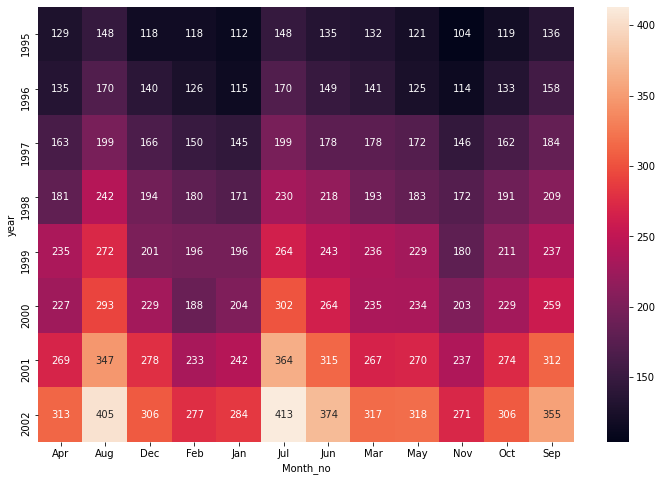

In [35]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data1,values="Passengers",index="year",columns="Month_no",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

In [46]:
data_f['t'] = data.index+ 1


,Passengers,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,Month_no_Apr,...,Month_no_Feb,Month_no_Jan,Month_no_Jul,Month_no_Jun,Month_no_Mar,Month_no_May,Month_no_Nov,Month_no_Oct,Month_no_Sep,t
Month,,,,,,,,,,,,,,,,,,,,,
1995-01-01,112,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1995-02-01,118,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
1995-03-01,132,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1995-04-01,129,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
1995-05-01,121,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5


In [47]:
data_f["t_square"]=data_f.t * data_f

,Passengers,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,Month_no_Apr,...,Month_no_Jan,Month_no_Jul,Month_no_Jun,Month_no_Mar,Month_no_May,Month_no_Nov,Month_no_Oct,Month_no_Sep,t,t_square
Month,,,,,,,,,,,,,,,,,,,,,
1995-01-01,112,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1995-02-01,118,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4
1995-03-01,132,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3,9
1995-04-01,129,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,16
1995-05-01,121,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,5,25


In [50]:
data_f["Log"]=np.log(data_f.Passengers)

In [51]:
data_f.head()

,Passengers,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,Month_no_Apr,...,Month_no_Jul,Month_no_Jun,Month_no_Mar,Month_no_May,Month_no_Nov,Month_no_Oct,Month_no_Sep,t,t_square,Log
Month,,,,,,,,,,,,,,,,,,,,,
1995-01-01,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,118,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,132,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,3,9,4.882802
1995-04-01,129,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,121,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,5,25,4.795791


In [52]:
# Splitting the data
Train = data_f.head(80)
Test = data_f.tail(16)

In [53]:
Test

,Passengers,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,Month_no_Apr,...,Month_no_Jul,Month_no_Jun,Month_no_Mar,Month_no_May,Month_no_Nov,Month_no_Oct,Month_no_Sep,t,t_square,Log
Month,,,,,,,,,,,,,,,,,,,,,
2001-09-01,312,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,81,6561,5.743003
2001-10-01,274,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,82,6724,5.613128
2001-11-01,237,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,83,6889,5.468060
2001-12-01,278,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,84,7056,5.627621
2002-01-01,284,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,85,7225,5.648974
2002-02-01,277,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,86,7396,5.624018
2002-03-01,317,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,87,7569,5.758902
2002-04-01,313,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,88,7744,5.746203
2002-05-01,318,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,89,7921,5.762051


In [54]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.54262406772677

In [55]:
#Exponential

Exp = smf.ols('Log~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

In [56]:
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584248

In [58]:
data_f.columns

Index(['Passengers', 'year_1995', 'year_1996', 'year_1997', 'year_1998',
       'year_1999', 'year_2000', 'year_2001', 'year_2002', 'Month_no_Apr',
       'Month_no_Aug', 'Month_no_Dec', 'Month_no_Feb', 'Month_no_Jan',
       'Month_no_Jul', 'Month_no_Jun', 'Month_no_Mar', 'Month_no_May',
       'Month_no_Nov', 'Month_no_Oct', 'Month_no_Sep', 't', 't_square', 'Log'],
      dtype='object')

In [59]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Month_no_Apr+Month_no_Aug+ Month_no_Dec+ Month_no_Feb+ Month_no_Jan+Month_no_Jul+ Month_no_Jun+ Month_no_Mar+ Month_no_May+Month_no_Nov+ Month_no_Oct+ Month_no_Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_no_Apr',
       'Month_no_Aug', 'Month_no_Dec', 'Month_no_Feb', 'Month_no_Jan',
       'Month_no_Jul', 'Month_no_Jun', 'Month_no_Mar', 'Month_no_May',
       'Month_no_Nov', 'Month_no_Oct', 'Month_no_Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443301

In [61]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Month_no_Apr+Month_no_Aug+ Month_no_Dec+ Month_no_Feb+ Month_no_Jan+Month_no_Jul+ Month_no_Jun+ Month_no_Mar+ Month_no_May+Month_no_Nov+ Month_no_Oct+ Month_no_Sep',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_no_Apr',
       'Month_no_Aug', 'Month_no_Dec', 'Month_no_Feb', 'Month_no_Jan',
       'Month_no_Jul', 'Month_no_Jun', 'Month_no_Mar', 'Month_no_May',
       'Month_no_Nov', 'Month_no_Oct', 'Month_no_Sep','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570108673

In [62]:
Mul_sea = smf.ols('Log~Month_no_Apr+Month_no_Aug+ Month_no_Dec+ Month_no_Feb+ Month_no_Jan+Month_no_Jul+ Month_no_Jun+ Month_no_Mar+ Month_no_May+Month_no_Nov+ Month_no_Oct+ Month_no_Sep',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621073

In [63]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('Log~t+Month_no_Apr+Month_no_Aug+ Month_no_Dec+ Month_no_Feb+ Month_no_Jan+Month_no_Jul+ Month_no_Jun+ Month_no_Mar+ Month_no_May+Month_no_Nov+ Month_no_Oct+ Month_no_Sep',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.469000230375746

In [64]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


In [ ]:
# As seen in the above table the minimum error has Multiplicative additive seasonality model.
#created about 20 dummy variables for year and month.

In [5]:
#Naive Forecast Base
data2=pd.read_excel(r"C:\Users\mohan\Desktop\EXCEL r assignment\Forecasting\Airlines+Data.xlsx" ,parse_dates=True)
data2.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


<AxesSubplot:>

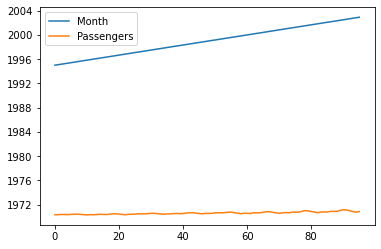

In [6]:
data2.plot()

In [7]:
# data is already smooth no need for smoothing

In [11]:
#Naive Forecast
data2_base=pd.concat([data2,data2["Passengers"].shift(1)],axis=1)

In [12]:
data2_base

,Month,Passengers,Passengers
0,1995-01-01,112,NaN
1,1995-02-01,118,112.0
2,1995-03-01,132,118.0
3,1995-04-01,129,132.0
4,1995-05-01,121,129.0
...,...,...,...
91,2002-08-01,405,413.0
92,2002-09-01,355,405.0
93,2002-10-01,306,355.0
94,2002-11-01,271,306.0


In [14]:
data2_base.columns = ['Month', 'Actual_Passengers', 'Forecast_Passengers']

In [16]:
data2_base.dropna(inplace=True)

In [17]:
data2_base.head()

,Month,Actual_Passengers,Forecast_Passengers
1,1995-02-01,118,112.0
2,1995-03-01,132,118.0
3,1995-04-01,129,132.0
4,1995-05-01,121,129.0
5,1995-06-01,135,121.0


In [18]:
from sklearn.metrics import mean_squared_error
Naive_error=mean_squared_error(data2_base.Actual_Passengers,data2_base.Forecast_Passengers)

In [19]:
Naive_error

544.4421052631579

In [20]:
np.sqrt(Naive_error)# error for Naive forecast

23.33328320796621

In [22]:
# ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

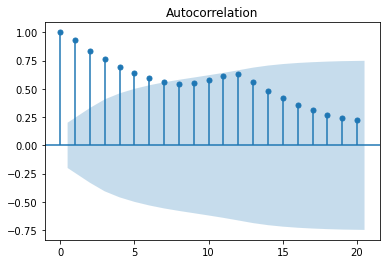

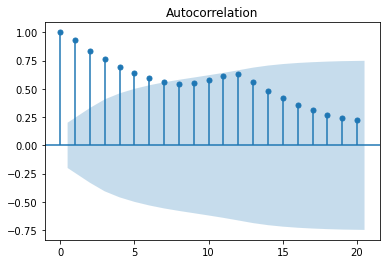

In [28]:
plot_acf(data)

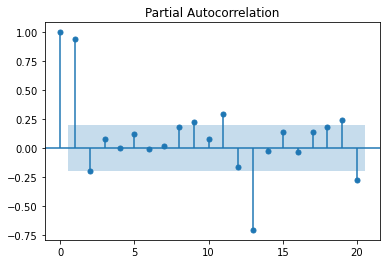

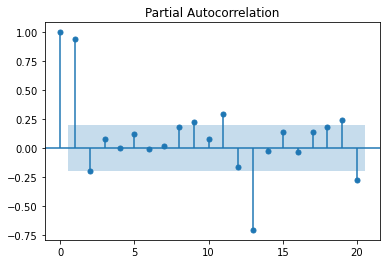

In [29]:
plot_pacf(data)

In [30]:
data.shape

(96,)

In [31]:
#q=7 p=2 d=0-2
from statsmodels.tsa.arima_model import ARIMA
data_train=data[0:80]
data_test=data[80:97]

In [36]:
model=ARIMA(data_train,order=(6,1,1))

C:\Users\mohan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [38]:
model_fit=model.fit()

C:\Users\mohan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [39]:
model_fit.aic # lesser the value bad is the model

686.9454724204064

In [42]:
data_forecast=model_fit.forecast(steps=16)[0]

In [43]:
np.sqrt(mean_squared_error(data_test,data_forecast))

39.92773158148527

In [ ]:
# as we can see base line model is better than arima method